# Comparação entre Renda Fixa e Variável:
Neste notebook, pretendo simular como teria sido investir 100 reais por mês em uma aplicação CDB de liquidez diária rendendo 100% do CDI, simular como teria sido a evolução de um patrimonio no mesmo período com compras mensais de algumas ações, considerar os dividendos, considerar a inflação, e comparar os resultados.



Feito: 
- Comparação gráfica entre valores paradas em conta-corrente e valores investidos em renda-fixa

A fazer: 
- Evolução de um patrimônio pela estratégia de comprar e segurar ações;
- Estabelecer as métricas que vão medir o dinheiro investido;
- Descontar a inflação;
- Comparar as estratégias.

In [1]:
import requests
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Abaixo, temos uma função que consulta uma API do Banco Central e retorna dados solicitados:

In [2]:
hoje = pd.to_datetime("today").strftime("%d/%m/%Y")

def get_bc(codigo, data_inicial=None, data_final=hoje):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo)
    p   = {
        'dataInicial': data_inicial,
        'dataFinal'  : data_final
    }
    response = requests.get(url, params=p)
    if response.status_code == 200:
        dados = pd.DataFrame(response.json())
    else:
        print('Erro na requisição:', response.status_code)
    dados['data'] = pd.to_datetime(dados['data'], format="%d/%m/%Y")
    dados.set_index('data', inplace=True)
    dados['valor'] = pd.to_numeric(dados['valor'])
    dados
    return dados

In [3]:
ipca = get_bc(433, data_inicial='01/01/2016')  # Série temporal da IPCA (mês)
cdi  = get_bc(12,  data_inicial='01/01/2016')  # Série temporal da taxa CDI (dia)

In [4]:
cdi = cdi[cdi.index >= '2016']
cdi

,valor
data,
2016-01-04,0.052496
2016-01-05,0.052496
2016-01-06,0.052496
2016-01-07,0.052496
2016-01-08,0.052496
...,...
2023-07-11,0.050788
2023-07-12,0.050788
2023-07-13,0.050788


Abaixo, temos dois patrimonios iniciais de 100 reais acrescidos de mais 100 reais a cada mês. Um deles rendendo 100% de uma CDI de liquidez diária.

In [5]:
patrimonio = 100
patrimonio2 = 100
serie = [patrimonio]
serie2 = [patrimonio2]
mes = 1

for dia in cdi.index[:-1]:
    if mes != dia.month:
        mes = dia.month
        patrimonio  += 100
        patrimonio2 += 100
    i = cdi[cdi.index == dia]['valor'][0]
    patrimonio = patrimonio*(1+i/100)
    serie.append(patrimonio)
    serie2.append(patrimonio2)
    
patrimonio

12301.208086799004

Aqui plotamos um gráfico para comparar a diferença entre guardar dinheiro e investir em renda-fixa como feito acima. Vemos que a quantia investida parece crescer exponencialmente, o que é esperado em um regime de juros compostos. 

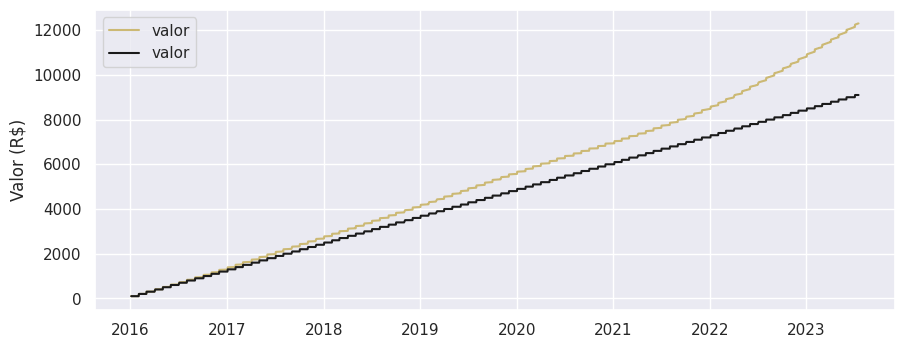

In [6]:
fig1 = plt.figure(figsize=(8,3), dpi=100)

axes1 = fig1.add_axes([0, 0, 1, 1])
axes1.plot(cdi.index, serie, 'y', label='valor')
axes1.plot(cdi.index, serie2, 'k', label='valor')
axes1.set_ylabel('Valor (R$)')
axes1.legend(loc=0)